# I want to compare the computation of cumulative SR at different time resolutions

In [85]:
import pysolar as ps
import datetime as dt
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd

In [86]:
SFF = xr.open_dataset('SES2004_2022.nc')
LAT, LON = SFF.lat.data[len(SFF.lat)//2], SFF.lon.data[len(SFF.lon)//2]
LAT, LON

(47.845833333333324, -113.51250000000002)

In [87]:
lat,lon = LAT,LON

altitudes_h = []
radiations_h = []
azimuths_h = []
dates_h = []

altitudes_10m = []
radiations_10m = []
azimuths_10m = []
dates_10m = []

i=0

for d in range(1,15):
    for h in range(24):
        try:
            date = dt.datetime(2005, 1,d,h, tzinfo=dt.timezone(offset=-dt.timedelta(hours=7)))
            dates_h.append(date)
            altitudes_h.append(ps.solar.get_altitude(lat, lon, date))
            radiations_h.append(np.maximum(0, ps.radiation.get_radiation_direct(date, ps.solar.get_altitude(lat, lon, date))))
            azimuths_h.append(np.maximum(0, ps.solar.get_azimuth(lat, lon, date)))
        except: print("Error at m=%i, d=%i, h=%i" %(m,d,h))
        for minu in range(0,60,10):
            try:
                date = dt.datetime(2005, 1,d,h,minu, tzinfo=dt.timezone(offset=-dt.timedelta(hours=7)))
                dates_10m.append(date)
                altitudes_10m.append(ps.solar.get_altitude(lat, lon, date))
                radiations_10m.append(np.maximum(0, ps.radiation.get_radiation_direct(date, ps.solar.get_altitude(lat, lon, date))))
                azimuths_10m.append(np.maximum(0, ps.solar.get_azimuth(lat, lon, date)))
            except: print("Error at m=%i, d=%i, h=%i" %(m,d,h))

        i+=1

In [88]:
dates_10m[-1], dates_h[-1]

(datetime.datetime(2005, 1, 14, 23, 50, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=61200))),
 datetime.datetime(2005, 1, 14, 23, 0, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=61200))))

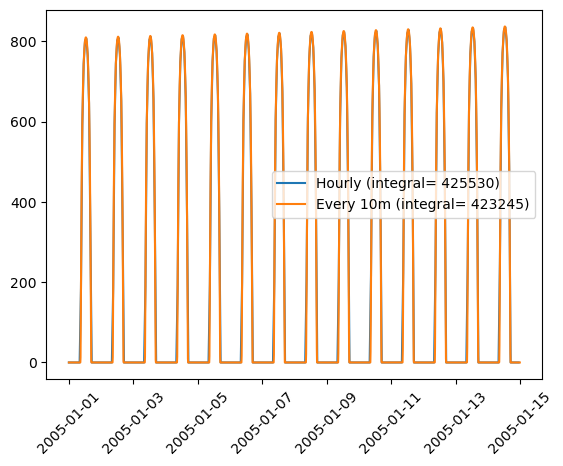

In [90]:
plt.plot(dates_h, radiations_h, label='Hourly (integral= %i)'%(6*np.sum(radiations_h)))
plt.plot(dates_10m, radiations_10m, label='Every 10m (integral= %i)'%np.sum(radiations_10m))
plt.xticks(rotation=45)
# plt.text(dates_h[0], 700, 'Hourly integral: %i\n10m integral: %i'%(6*np.sum(radiations_h),np.sum(radiations_10m)))
plt.legend()
plt.show()

In [1]:
425530/423245

1.005398764309088

# An hourly computation seems reasonable to me!!